In [7]:
import sys
sys.path.insert(0,'..')  # add project root to PATH

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# import necessary packages

from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import os.path
import json
import re
import copy

# packages
from src.preprocessing import JSONUtil
from src.annotated_image import Image, AnnotatedImage
#from Paprika_Detector.source.image_utils import read_json, imread_rgb, plt_plot, draw_box, scale_image, scale_image_padding

In [10]:
# set path
path = "../data/"
img_name = "fel_001_pap.jpg"

# load json
master_json = JSONUtil.read(path + "master.json")

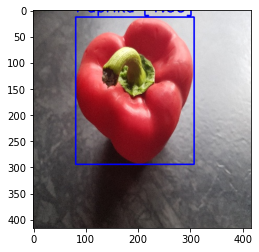

In [11]:
# load image and annotations
annotated_image = AnnotatedImage(image_path=path + img_name, annotation_dict=master_json)
annotated_image.show()

# Jittering

In [12]:
def rand_aspect_ratio(jitter, w, h):
    s1 = np.random.rand()*((1+jitter)- (1-jitter)) + (1-jitter)
    s2 = np.random.rand()*((1+jitter)- (1-jitter)) + (1-jitter)
    return w/h * s1/s2

In [13]:
# set jitter
jitter =0.3

In [14]:
height, width = annotated_image.image.image_data.shape[:2]

new_aspect_ratio = rand_aspect_ratio(jitter, width, height)
new_scale = np.random.rand()*(2-0.25)+0.25
print(new_aspect_ratio, new_scale)

1.2290296031349337 0.48626642697060785


In [15]:
# compute new scale
if new_aspect_ratio < 1:
    nh = int(new_scale*height)
    nw = int(nh*new_aspect_ratio)
else:
    nw = int(new_scale*width)
    nh = int(nw/new_aspect_ratio)

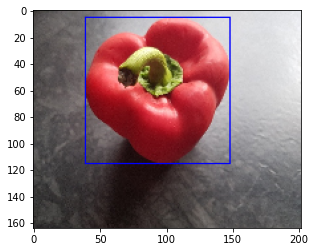

In [16]:
# Scale image to new scale
scaled_image = copy.deepcopy(annotated_image)
scaled_image.resize(width=nw, height=nh)
scaled_image.show()

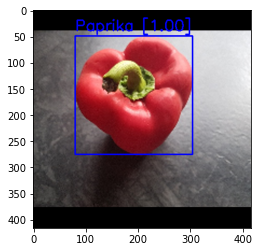

In [18]:
# resize with padding back to 416, 416
jittered_image = copy.deepcopy(scaled_image)
jittered_image.resize_keep_aspect_ratio(width=416, height=416)
jittered_image.show()